# Gaussian Integers

<i>Version 2</i>

> <i>In number theory, a Gaussian integer is a complex number whose real and imaginary parts are both integers. The Gaussian integers, with ordinary addition and multiplication of complex numbers, form an integral domain, usually written as $\mathbb{Z}[i]$.</i>
> 
> <i>Gaussian integers are named after the German mathematician Carl Friedrich Gauss.</i>
> 
> -- [Wikipedia](https://en.wikipedia.org/wiki/Gaussian_integer)

## References

* [The Gaussian Integers](https://kconrad.math.uconn.edu/blurbs/ugradnumthy/Zinotes.pdf) by Keith Conrad
* [Gaussian Prime](https://mathworld.wolfram.com/GaussianPrime.html) - Wolfram
* [1.13: The Gaussian Integers](https://math.libretexts.org/Bookshelves/Combinatorics_and_Discrete_Mathematics/Elementary_Number_Theory_(Barrus_and_Clark)/01%3A_Chapters/1.13%3A_The_Gaussian_Integers) in [Elementary Number Theory](https://math.libretexts.org/Bookshelves/Combinatorics_and_Discrete_Mathematics/Elementary_Number_Theory_(Barrus_and_Clark)) by Barrus and Clark
* [Gaussian Integers and Rings of Algebraic Integers](https://www.math.uci.edu/~ndonalds/math180b/6gaussian.pdf) in lecture notes by Neil Donaldson
* [Gaussian integer -- Wikipedia](https://en.wikipedia.org/wiki/Gaussian_integer)
* Python:
  * [divmod](https://docs.python.org/3/library/functions.html#divmod) - implements the division theorem for Python integers or floats
  * [Emulating Numeric Types](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types)
  * [cmath — Mathematical functions for complex numbers](https://docs.python.org/3/library/cmath.html)
  * [math — Mathematical functions](https://docs.python.org/3/library/math.html)
  * [Python standard operators](https://docs.python.org/3/library/operator.html)

## Zi, the Class of Gaussian Integers

The Python module, ``gaussian_integers``, defines a class, ``Zi``, that implements an object with Gaussian integer functionality.

A ``Zi`` has only two fields, ``real`` and ``imag``; both are integers.

The source code, along with this Jupyter notebook and others, can be found on Github: https://github.com/alreich/abstract_algebra

In [1]:
from gaussian_integers import Zi

## Just for Fun...

The following scatter plot depicts the following:

* all non-prime Gaussian integers (light blue dots),
* the Gaussian primes, $a+bi \in \mathbb{Z}[i]$ such that $|a|, |b| \le n$ (red dots),
* and primes that are not Gaussian primes (black dots)

10201 Gaussian integers in total (101^2), including Gaussian primes
1852 Gaussian primes


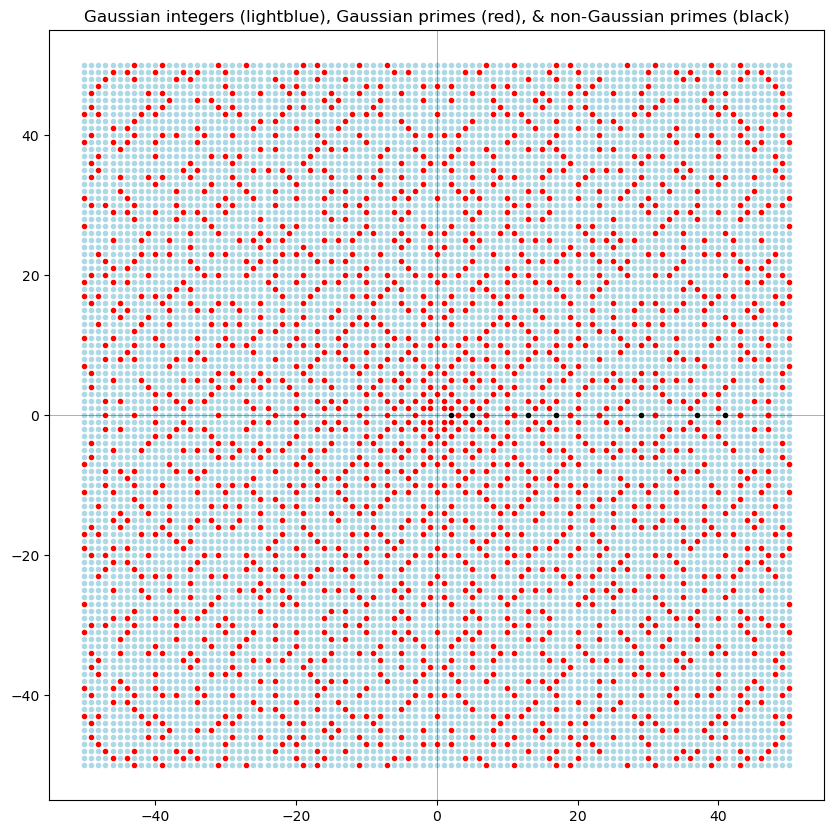

In [2]:
import matplotlib.pyplot as plt
from gaussian_integers import isprime

n = 50
nx = n; ny = n
xs = []; ys = []
js = []; ks = []
zx = []; zy = []
gp_count = 0; gi_count = 0; 

for x in range(-nx, nx + 1):
    if isprime(x):
        zx.append(x)
        zy.append(0)
    for y in range(-ny, ny +1 ):
        gi = Zi(x, y)
        gi_count += 1
        if Zi.is_gaussian_prime(gi):
            gp_count += 1
            xs.append(x)
            ys.append(y)
        else:
            js.append(x)
            ks.append(y)

plt.figure(figsize=(10, 10))
plt.axvline(0, color = 'blue', alpha = 0.5, linewidth = 0.5)
plt.axhline(0, color = 'blue', alpha = 0.5, linewidth = 0.5)
plt.scatter(js, ks, marker=".", color = 'lightblue')
plt.scatter(zx, zy, marker=".", color = 'k')
plt.scatter(xs, ys, marker=".", color = 'r')
plt.title(f"Gaussian integers (lightblue), Gaussian primes (red), & non-Gaussian primes (black)")
      
_ = plt.show
print(f"{gi_count} Gaussian integers in total ({2 * n + 1}^2), including Gaussian primes")
print(f"{gp_count} Gaussian primes")

## Creating Gaussian Integers

In [3]:
c1 = Zi(4, 5)
c1

Zi(4, 5)

In [4]:
c2 = Zi(1, -2)
c2

Zi(1, -2)

In [5]:
zero = Zi()
zero

Zi(0, 0)

In [6]:
one = Zi(1)
one

Zi(1, 0)

``Zi.eye()`` is a **class method** that produces the ``Zi`` version of $i$, the so-called "square root of -1": $\sqrt{-1}$

In [7]:
eye = Zi.eye()  # i (the "square root of -1")
eye

Zi(0, 1)

Floating point numbers are rounded to the nearest integer.

This behavior is used in many places in the code, including the implementation of the **Modified Division Theorem**

In [8]:
Zi(2.1, 5)

Zi(2, 5)

In [9]:
Zi(-2, 6.7)

Zi(-2, 7)

In [10]:
Zi(2.5, 6.3)

Zi(2, 6)

The first argument can be a complex number. If so, the second argument is ignored.

The real & imag parts of the complex number are rounded to nearest integers.

In [11]:
Zi((2.2 - 3.9j))

Zi(2, -4)

In [12]:
Zi((2-3j))

Zi(2, -3)

In [13]:
Zi(1j)

Zi(0, 1)

In [14]:
Zi((1+0j))

Zi(1, 0)

## Conversion to a Complex Number

In [15]:
complex(c1)

(4+5j)

The string function, ``str``, will convert a Gint to the string version of its corresponding complex number.

Also, see the section, "Printing Gaussian Integers" below.

In [16]:
str(c1)

'(4+5j)'

## Zi Accessors

In [17]:
c1.real

4

In [18]:
c1.imag

5

The **norm** and **conjugate** are not accessors, but they are implemented as properties, so they behave like accessors.

In [19]:
c1.norm

41

In [20]:
c1.conjugate

Zi(4, -5)

And for completeness, the <i>absolute value</i>...

In [21]:
abs(c1)

6.4031242374328485

## Printing Gaussian Integers

For ``Zi``, the string representation is the same as that of a complex number in Python.  So, in printed form, a ``Zi`` looks like an ordinary Python complex number (which uses $j$ rather than $i$).

In [22]:
print(Zi(2, -3))
print(eye)
print(zero)

(2-3j)
1j
0j


## Gaussian Integer Arithmetic

### Addition

In [23]:
print(f"{c1} + {c2} = {c1 + c2}\n")  # Zi + Zi

print(f"{c1} + 2 = {c1 + 2}")  # Zi + int
print(f"2 + {c1} = {2 + c1}\n")  # int + Zi

print(f"{c1} + 1.9 = {c1 + 1.9}")  # Zi + float
print(f"1.9 + {c1} = {1.9 + c1}\n")  # float + Zi

cx = (1-1j)
print(f"{c1} + {cx} = {c1 + cx}")  # Zi + complex
print(f"{cx} + {c1} = {cx + c1}")  # complex + Zi

(4+5j) + (1-2j) = (5+3j)

(4+5j) + 2 = (6+5j)
2 + (4+5j) = (6+5j)

(4+5j) + 1.9 = (6+5j)
1.9 + (4+5j) = (6+5j)

(4+5j) + (1-1j) = (5+4j)
(1-1j) + (4+5j) = (5+4j)


In-place assignment for addition:

In [24]:
sum = Zi()
check = 0  # Also works for floats or complex

for k in range(5):
    check += k
    sum += Zi(k, k)

print(check, sum)

10 (10+10j)


### Subtraction

In [25]:
print(f"{c1} - {c2} = {c1 - c2}\n")

print(f"{c1} - 2 = {c1 - 2}")
print(f"2 - {c1} = {2 - c1}\n")

print(f"{c1} - 1.9 = {c1 - 1.9}")
print(f"1.9 - {c1} = {1.9 - c1}\n")

cx = (1-1j)
print(f"{c1} - {cx} = {c1 - cx}")
print(f"{cx} - {c1} = {cx - c1}")

(4+5j) - (1-2j) = (3+7j)

(4+5j) - 2 = (2+5j)
2 - (4+5j) = (-2-5j)

(4+5j) - 1.9 = (2+5j)
1.9 - (4+5j) = (-2-5j)

(4+5j) - (1-1j) = (3+6j)
(1-1j) - (4+5j) = (-3-6j)


In-place assignment for subtraction:

In [26]:
diff = Zi(10, 10)
check = 10

for k in range(5):
    check -= k
    diff -= Zi(k, k)

print(check, diff)

0 0j


### Multiplication

In [27]:
print(f"{c1} x {c2} = {c1 * c2}\n")

print(f"{c1} x 2 = {c1 * 2}")
print(f"2 x {c1} = {2 * c1}\n")

print(f"{c1} x 1.9 = {c1 * 1.9}")
print(f"1.9 x {c1} = {1.9 * c1}\n")

cx = (2-1j)
print(f"{c1} * {cx} = {c1 * cx}")
print(f"{cx} * {c1} = {cx * c1}\n")

cx = (1.9-1.1j)
print(f"{c1} * {cx} = {c1 * cx}")
print(f"{cx} * {c1} = {cx * c1}\n")

(4+5j) x (1-2j) = (14-3j)

(4+5j) x 2 = (8+10j)
2 x (4+5j) = (8+10j)

(4+5j) x 1.9 = (8+10j)
1.9 x (4+5j) = (8+10j)

(4+5j) * (2-1j) = (13+6j)
(2-1j) * (4+5j) = (13+6j)

(4+5j) * (1.9-1.1j) = (13+6j)
(1.9-1.1j) * (4+5j) = (13+6j)



In-place assignment for multiplication:

In [28]:
prod = Zi(1, 0)
check = 1

for k in range(1, 5):
    check *= k
    prod *= Zi(k, 0)

print(check, prod)

24 (24+0j)


### Division

There are four ways to perform "division", illustrated below.

**1. truediv, using the operator, ``/``**

In [29]:
help(Zi.__truediv__)

Help on function __truediv__ in module gaussian_integers:

__truediv__(self, other) -> gaussian_rationals.Qi
    Divide self by other, exactly, and return the resulting Gaussian rational, Qi.
    
    Implements the / operator, and returns the exact, Gaussian rational result
    of dividing this Gaussian integer by another Gaussian integer, or an int,
    float, or complex. Floats & complexes will be rounded.



Note that if $\alpha, \beta \in \mathbb{Z}[i]$, then $\alpha / \beta \in \mathbb{Q}[i]$.

In [30]:
Zi(4, 5) / Zi(1, -2)

Qi('-6/5', '13/5')

In [31]:
Zi(4, 5) / (1-2j)

Qi('-6/5', '13/5')

In [32]:
Zi(4, 5) / (1.1-1.9j)

Qi('-6/5', '13/5')

In [33]:
Zi(4, 5) / (0.9-2.3j)

Qi('-6/5', '13/5')

In [34]:
complex(Zi(4, 5) / (0.9-2.3j))

(-1.2+2.6j)

In [35]:
complex(Zi(4, 5)) / (0.9-2.3j)

(-1.2950819672131149+2.2459016393442623j)

In [36]:
Zi(4, 5) / 5

Qi('4/5', '1')

In [37]:
Zi(4, 5) / 5.3

Qi('4/5', '1')

In [38]:
print(f"(1-2j) / Zi(4, 5) -> {(1-2j) / Zi(4, 5)}")
print(f"5.0 / Zi(4, 5) -> {5.0 / Zi(4, 5)}")
print(f"5 / Zi(4, 5) -> {5 / Zi(4, 5)}")

(1-2j) / Zi(4, 5) -> (-6/41-13/41j)
5.0 / Zi(4, 5) -> (20/41-25/41j)
5 / Zi(4, 5) -> (20/41-25/41j)


**2. floordiv, using the operator, ``//``**

In [39]:
help(Zi.__floordiv__)  # WARNING: Zi.__floordiv uses round, instead of floor

Help on function __floordiv__ in module gaussian_integers:

__floordiv__(self, other)
    Implements the // operator using 'round', instead of 'floor'.
    
    Returns the closest integer approximation to the quotient, self / other,
    as a Zi, by rounding the real and imag parts after division, not flooring.
    'other' can be an int, float, complex, or Zi.



In [40]:
print(f"Zi(4, 5) // Zi(1, -2) -> {Zi(4, 5) // Zi(1, -2)}")
print(f"Zi(4, 5) // (1-2j) -> {Zi(4, 5) // (1-2j)}")
print(f"Zi(4, 5) // 5.0 -> {Zi(4, 5) // 5.0}")
print(f"Zi(4, 5) // 5 -> {Zi(4, 5) // 5}")

Zi(4, 5) // Zi(1, -2) -> (-1+3j)
Zi(4, 5) // (1-2j) -> (-1+3j)
Zi(4, 5) // 5.0 -> (1+1j)
Zi(4, 5) // 5 -> (1+1j)


In [41]:
print(f"(8-12j) // Zi(4, 5) -> {(8-12j) // Zi(4, 5)}")
print(f"20.0 // Zi(4, 5) -> {20.0 // Zi(4, 5)}")
print(f"20 // Zi(4, 5) -> {20 // Zi(4, 5)}")

(8-12j) // Zi(4, 5) -> (-1-2j)
20.0 // Zi(4, 5) -> (2-2j)
20 // Zi(4, 5) -> (2-2j)


**3. The Zi function, modified_divmod**

In [42]:
help(Zi.modified_divmod)

Help on function modified_divmod in module gaussian_integers:

modified_divmod(a, b)
    The divmod algorithm, modified for Gaussian integers.
    
    Returns q & r, such that a = b * q + r, where
    (1/2) * r.norm < b.norm. This is the Modified Division
    Theorem described in 'The Gaussian Integers' by Keith Conrad



In [43]:
a = Zi(4, 5)
b = Zi(1, -2)

q, r = Zi.modified_divmod(a, b)

print(f"{b * q + r} = {b} * {q} + {r}")

(4+5j) = (1-2j) * (-1+3j) + (-1+0j)


In [44]:
print(f"r.norm = {r.norm}")
print(f"b.norm = {b.norm}")

(1/2) * r.norm < b.norm

r.norm = 1
b.norm = 5


True

**4. mod, using the operator, ``%``**

In [45]:
help(Zi.__mod__)

Help on function __mod__ in module gaussian_integers:

__mod__(self, other)
    Implements the % operator.
    
    Returns the remainder of the result from modified_divmod



In [46]:
print(f"{a} % {b} = {a % b}")

(4+5j) % (1-2j) = (-1+0j)


### More modified_divmod Examples

The following four examples are from [Conrad]

**Example 3.2 in [Conrad]**

In [47]:
alpha = Zi((27-23j))
beta = Zi((8+1j))

quot, rem = Zi.modified_divmod(alpha, beta)

if beta * quot + rem == alpha:
    print(f"{beta * quot + rem} = {beta} x {quot} + {rem}")
else:
    print("Fail")

(27-23j) = (8+1j) x (3-3j) + -2j


**Example 3.3 in [Conrad]**

In [48]:
alpha = Zi((11+10j))
beta = Zi((4+1j))

quot, rem = Zi.modified_divmod(alpha, beta)

if beta * quot + rem == alpha:
    print(f"{beta * quot + rem} = {beta} x {quot} + {rem}")
else:
    print("Fail")

(11+10j) = (4+1j) x (3+2j) + (1-1j)


**Example 3.4 in [Conrad]**

In [49]:
alpha = Zi((41+24j))
beta = Zi((11-2j))

quot, rem = Zi.modified_divmod(alpha, beta)

if beta * quot + rem == alpha:
    print(f"{beta * quot + rem} = {beta} x {quot} + {rem}")
else:
    print("Fail")

(41+24j) = (11-2j) x (3+3j) + (2-3j)


**Example 3.5 in [Conrad]**

In [50]:
alpha = Zi((37+2j))
beta = Zi((11+2j))

quot, rem = Zi.modified_divmod(alpha, beta)

if beta * quot + rem == alpha:
    print(f"{beta * quot + rem} = {beta} x {quot} + {rem}")
else:
    print("Fail")

(37+2j) = (11+2j) x (3+0j) + (4-4j)


### Powers

In [51]:
c1 * c1 * c1

Zi(-236, 115)

In [52]:
c1**3

Zi(-236, 115)

Raising any ``Zi`` to the power 0 will result in the ``Zi`` equivalent of 1, i.e., Gint(1, 0).

In [53]:
c1**0

Zi(1, 0)

In [54]:
c1

Zi(4, 5)

Raising a ``Zi`` to a negative power will produce a Gaussian rational.

That is, if $\alpha \in \mathbb{Z}[i]$ and $n \in \mathbb{Z}$, where $n < 0$, then $\alpha^{-n} = 1 / \alpha^n \in \mathbb{Q}[i]$

In [55]:
c1**-3

Qi('-236/68921', '-115/68921')

In [56]:
1 / c1**3

Qi('-236/68921', '-115/68921')

### Negation

In [57]:
c2

Zi(1, -2)

In [58]:
-c2

Zi(-1, 2)

### Equality or Inequality Tests

In [59]:
c1

Zi(4, 5)

In [60]:
c1_dup = Zi(4, 5)

In [61]:
c1 == Zi(4, 5)

True

In [62]:
c1 == c2

False

In [63]:
c1 != c2

True

## Associates

In [64]:
print(c1)
_ = [print(a) for a in c1.associates()]

(4+5j)
(-4-5j)
(-5+4j)
(5-4j)


In [65]:
c1.is_associate(Zi(-4, -5))

True

In [66]:
c1.is_associate(c2)

False

## Units

**units** is a **static method** that returns the four Gaussian integer units.

In [67]:
Zi.units()

[Zi(1, 0), Zi(-1, 0), Zi(0, 1), Zi(0, -1)]

## Greatest Common Divisor

In [68]:
help(Zi.gcd)

Help on function gcd in module gaussian_integers:

gcd(a, b, verbose=False)
    A gcd algorithm for Gaussian integers.
    Returns the greatest common divisor of a & b.
    
    This function implements the Euclidean algorithm for Gaussian integers.



Examples 4.4-4.6 in [Conrad]

In [69]:
verbosity = True

alpha = Zi(32, 9)
beta = Zi(4, 11)
print(f"EX 4.4: gcd({alpha}, {beta}) -> {Zi.gcd(alpha, beta, verbose=verbosity)}\n")

alpha = Zi(4, 5)
beta = Zi(4, -5)
print(f"EX 4.5: gcd({alpha}, {beta}) -> {Zi.gcd(alpha, beta, verbose=verbosity)}\n")

alpha = Zi(11, 3)
beta = Zi(1, 8)
print(f"EX 4.6: gcd({alpha}, {beta}) -> {Zi.gcd(alpha, beta, verbose=verbosity)}\n")

# print("Checking EX 4.6:")
# gcd = Zi.gcd(alpha, beta)
# print(f"{alpha} / {gcd} = {alpha / gcd}")
# print(f"{beta} / {gcd} = {beta / gcd}")

   (32+9j) = (4+11j) * (2-2j) + (2-5j)
   (4+11j) = (2-5j) * (-2+1j) + (3-1j)
   (2-5j) = (3-1j) * (1-1j) + -1j
   (3-1j) = -1j * (1+3j) + 0j
EX 4.4: gcd((32+9j), (4+11j)) -> -1j

   (4+5j) = (4-5j) * 1j + (-1+1j)
   (4-5j) = (-1+1j) * (-4+0j) + -1j
   (-1+1j) = -1j * (-1-1j) + 0j
EX 4.5: gcd((4+5j), (4-5j)) -> -1j

   (11+3j) = (1+8j) * (1-1j) + (2-4j)
   (1+8j) = (2-4j) * (-2+1j) + (1-2j)
   (2-4j) = (1-2j) * (2+0j) + 0j
EX 4.6: gcd((11+3j), (1+8j)) -> (1-2j)



## Extended Euclidean Algorithm

In [70]:
help(Zi.xgcd)

Help on function xgcd in module gaussian_integers:

xgcd(alpha, beta)
    The Extended Euclidean Algorithm for Gaussian Integers.
    
    Three values are returned: a, x, & y, such that
    the Greatest Common Divisor (gcd) of a & b can be
    written as gcd = a * x + b * y. x & y are called
    Bézout's coefficients.



In [71]:
alpha = Zi(11, 3)
beta = Zi(1, 8)

In [72]:
a, x, y = Zi.xgcd(alpha, beta)

In [73]:
print(f"a = {a}\nx = {x}\ny = {y}")

a = (1-2j)
x = (2-1j)
y = 3j


In [74]:
a == alpha * x + beta * y

True

In [75]:
print(f"{alpha * x + beta * y} = {alpha} * {x} + {beta} * {y}")

(1-2j) = (11+3j) * (2-1j) + (1+8j) * 3j


In [76]:
print(f"gcd({alpha}, {beta}) -> {Zi.gcd(alpha, beta)}")

gcd((11+3j), (1+8j)) -> (1-2j)


## Gaussian Primes

The following examples of **Gaussian primes** are from [Wolfram](https://mathworld.wolfram.com/GaussianPrime.html).

In [77]:
[p for p in range(50) if Zi.is_gaussian_prime(p)]

[3, 7, 11, 19, 23, 31, 43, 47]

In [78]:
# Gaussian primes with |re|, |im| <= n:

n = 5
primes = []
for re in range(-n, n + 1):
    for im in range(-n, n + 1):
        val = Zi(re, im)
        if Zi.is_gaussian_prime(val):
            primes.append(complex(val))
print(primes)

[(-5-4j), (-5-2j), (-5+2j), (-5+4j), (-4-5j), (-4-1j), (-4+1j), (-4+5j), (-3-2j), (-3+0j), (-3+2j), (-2-5j), (-2-3j), (-2-1j), (-2+1j), (-2+3j), (-2+5j), (-1-4j), (-1-2j), (-1-1j), (-1+1j), (-1+2j), (-1+4j), -3j, 3j, (1-4j), (1-2j), (1-1j), (1+1j), (1+2j), (1+4j), (2-5j), (2-3j), (2-1j), (2+1j), (2+3j), (2+5j), (3-2j), (3+0j), (3+2j), (4-5j), (4-1j), (4+1j), (4+5j), (5-4j), (5-2j), (5+2j), (5+4j)]


## Additional Examples

### Examples from [Barrus and Clark]

**Example 1.13.3**

In [79]:
alpha = 6
beta = Zi(2, 1)

print(f"{alpha = }")
print(f"{ beta = }")
print(f"{alpha / beta = }")

alpha = 6
 beta = Zi(2, 1)
alpha / beta = Qi('12/5', '-6/5')


In [80]:
kappa, rho = Zi.modified_divmod(alpha, beta)
print(f"{alpha - beta * kappa} = {alpha} - {beta} * {kappa}")

(1+0j) = 6 - (2+1j) * (2-1j)


**Example 1.13.4**

In [81]:
alpha = Zi((3j))
beta = Zi((1+1j))

print(f"{alpha = }")
print(f"{ beta = }")
print(f"{alpha / beta = }")

alpha = Zi(0, 3)
 beta = Zi(1, 1)
alpha / beta = Qi('3/2', '3/2')


In [82]:
kappa, rho = Zi.modified_divmod(alpha, beta)
print(f"{kappa = }")
print(f"{  rho = }")
# print(f"{alpha - beta * kappa} = {alpha} - {beta} * {kappa}")
print(f"{beta * kappa + rho} = {beta} * {kappa} + {rho}")

kappa = Zi(2, 2)
  rho = Zi(0, -1)
3j = (1+1j) * (2+2j) + -1j


In [83]:
print(f"{rho.norm = }")
print(f"{beta.norm = }")

rho.norm = 1
beta.norm = 2


**Example 1.13.5**

In [84]:
alpha = Zi((2-3j))
beta = Zi((3+5j))
print(f"{alpha = }")
print(f"{ beta = }")

alpha = Zi(2, -3)
 beta = Zi(3, 5)


In [85]:
gcd = Zi.gcd(alpha, beta)
print(f"{gcd = }")

gcd = Zi(0, -1)
